# Reproducibale Challenge Project
### Alexander Svensson & Love Sundin
2025-10-21

__(1)__ A well-defined problem


How benign the canser is.

__(2)__ Use data from an existing source, or generate data as part of a simulation experiment

[Länk Data](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)

In [21]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import keras

In [22]:
# Read input data and convert
column_names = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]
class_dict = {2: "Benign", 4: "Malignant"}
input_df = pd.read_csv("Data files/breast-cancer-wisconsin.data", header=None, names=column_names, na_values=["?"])
input_df["Class"] = input_df["Class"].replace(class_dict)

In [23]:
input_df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [24]:
print(input_df.isna().sum())
print(f'Shape original: {input_df.shape}')
input_df = input_df.dropna()
print(f'Shape after drop: {input_df.shape}')

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
Shape original: (699, 11)
Shape after drop: (683, 11)


In [25]:
# Split into training and test data
training_df, test_df = sklearn.model_selection.train_test_split(input_df, train_size=0.8, test_size=0.2, random_state=688712398)

Text(0.5, 1.0, 'Violin plots')

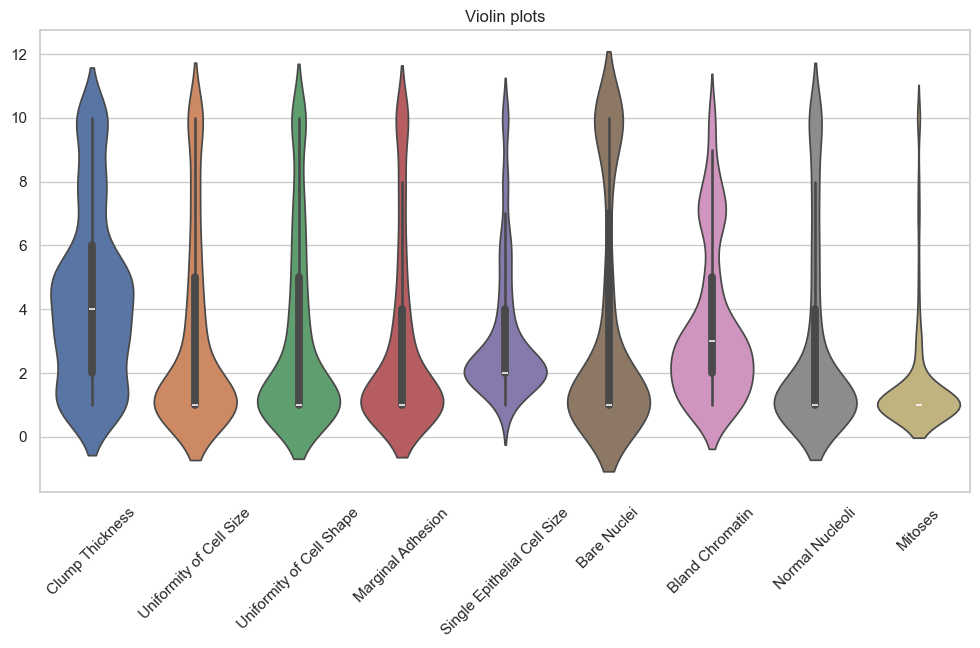

In [26]:
independent_variables = [
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses"
]

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.violinplot(data=training_df[independent_variables], inner='box')
plt.xticks(rotation=45)
plt.title("Violin plots")

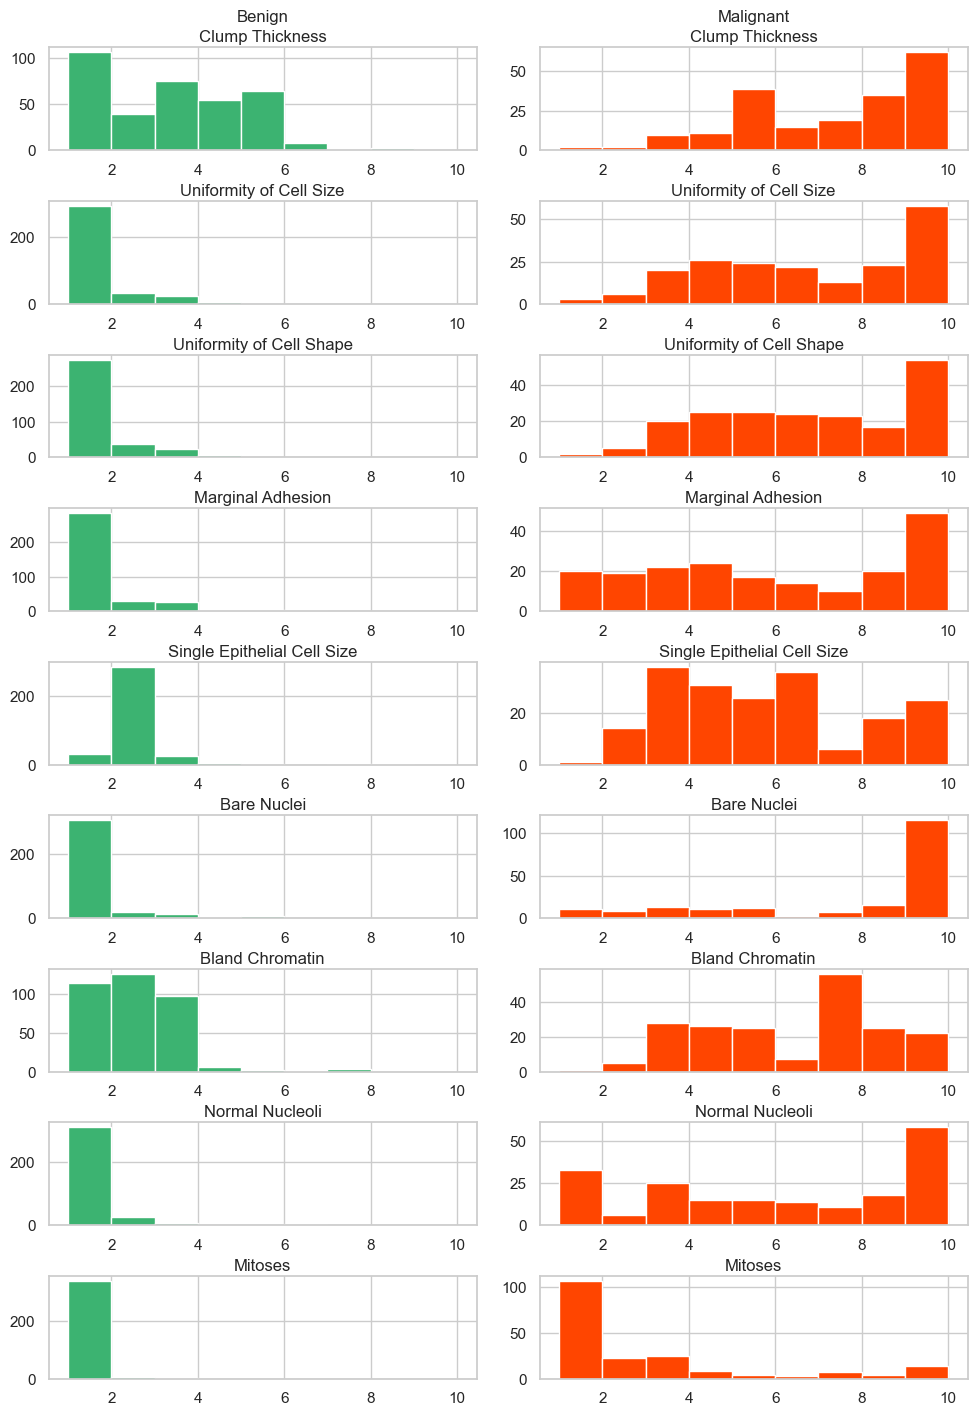

In [27]:
# Plot histograms for all independent variables

possible_classes = class_dict.values()

class_colors = ["mediumseagreen", "orangered"]

figure, axes = plt.subplots(9, 2)
figure.set_size_inches(10, 14)
figure.tight_layout()
bins = range(1, 11)
for class_index, tumor_class in enumerate(possible_classes):
    axis = axes[0, class_index]
    axis.set_title(tumor_class)
for variable_index, variable in enumerate(independent_variables):
    for class_index, tumor_class in enumerate(possible_classes):
        color = class_colors[class_index]
        axis = axes[variable_index][class_index]
        datapoints = training_df.query(f"Class == \"{tumor_class}\"")[variable]
        axis.hist(datapoints, color=color, bins=bins)
        axis.set_xlabel(variable)
        axis.xaxis.set_label_position('top') 

In [28]:
encoding_dict = {"Benign": 0, "Malignant": 1}

x_train = training_df[independent_variables]
y_train = training_df["Class"].replace(encoding_dict)
x_test = test_df[independent_variables]
y_test = test_df["Class"].replace(encoding_dict)

/tmp/ipykernel_39807/2490302067.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = training_df["Class"].replace(encoding_dict)
/tmp/ipykernel_39807/2490302067.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = test_df["Class"].replace(encoding_dict)


In [29]:
# Create network

simple_network = keras.Sequential()
simple_network.add(keras.layers.Input(shape=(len(independent_variables),)))
simple_network.add(keras.layers.Dense(32, activation="relu"))
simple_network.add(keras.layers.Dropout(0.2))
simple_network.add(keras.layers.Dense(16, activation="relu"))
simple_network.add(keras.layers.Dropout(0.2))
simple_network.add(keras.layers.Dense(1, activation="sigmoid"))
simple_network.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "precision", "recall"])
simple_network.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = simple_network.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.5387 - loss: 0.8435 - precision: 0.3722 - recall: 0.3060 - val_accuracy: 0.6636 - val_loss: 0.6727 - val_precision: 0.4667 - val_recall: 0.6176
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5068 - loss: 0.7122 - precision: 0.3884 - recall: 0.6326 - val_accuracy: 0.7273 - val_loss: 0.5990 - val_precision: 0.5333 - val_recall: 0.9412
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5892 - loss: 0.6695 - precision: 0.4538 - recall: 0.7344 - val_accuracy: 0.7545 - val_loss: 0.5634 - val_precision: 0.5614 - val_recall: 0.9412
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6651 - loss: 0.6163 - precision: 0.5163 - recall: 0.8397 - val_accuracy: 0.7818 - val_loss: 0.5300 - val_precision: 0.5926 - val_recall: 0.9412
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6850 - loss: 0.6076 - precision: 0.5481 - recall: 0.8499 - val_accuracy: 0.8091 - val_loss: 0.5105 - val_prec

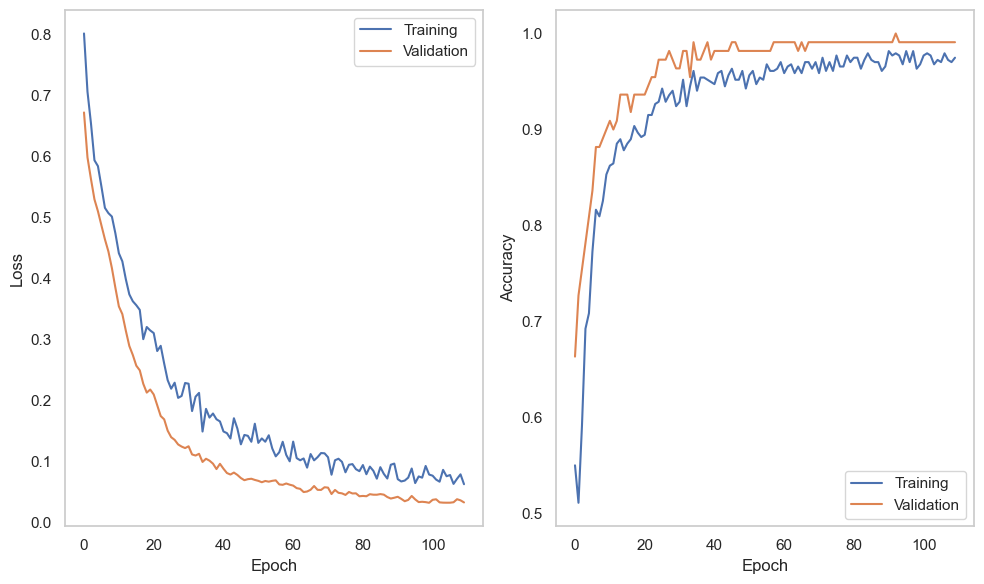

In [42]:
figure, axes = plt.subplots(1, 2)

axis=axes[0]
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
axis.plot(training_loss, label="Training")
axis.plot(validation_loss, label="Validation")
axis.grid()
axis.legend()
axis.set_xlabel("Epoch")
axis.set_ylabel("Loss")

axis = axes[1]
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
axis.plot(training_accuracy, label="Training")
axis.plot(validation_accuracy, label="Validation")
axis.grid()
axis.legend()
axis.set_xlabel("Epoch")
axis.set_ylabel("Accuracy")

figure.set_size_inches(10, 6)
figure.tight_layout()

plt.show()

__(3)__ Include data analysis with one or more methods of statistical learning from the course

* Unsupervised Learning – Clustering
* Supervised Learning – Classification
* __Neural Network Implementation__
* __Predictive modelling__

__(4)__ Justify the choice and discussion of limitations of the method

__(5)__ Data visualisation and a discussion of why particular graph styles were chosen.

__(6)__ Reflection on FAIR principles, and how each concept of the acronym relates to the project (data and workflow).

* __F__ - 
* __A__ - 
* __I__ - 
* __R__ - 

__(7)__ All of the above should be implemented in a reproducible workflow, e.g. a Jupyter Notebook. Please upload it to complete the final assignment.

__(8)__ Finally, all groups present their project for the class, maximum 10 minutes per group (please rehearse beforehand to ensure that you keep this limit, as the schedule is tight).

# Report

### Introduction and Objective

### Methodology for each task

### Results with supporting visuals

### Interpretation of Findings

### Conclusion summarizing key insights